# Integral of the Brownian motion with respect to time
We simulate paths for the standard Brownian motion and calculate the integral of each path in order to empirically verify the calculation below.

When I was learning stochastic calculus, I came across the following integral which is not a stochastic integral, but a pathwise Riemann integral. Thus the result is a random variable once $T$ is fixed. The integral in question is
$\int_{0}^{T} W_t dt$ where $W_t$ is the standard Brownian motion. Moreover, it has a clever several line calculation using stochastic integrals and Fubini's Theorem.
$$
\begin{align}
\int_{0}^{T} W_t \, dt &= \int_{0}^{T} \left( \int_{0}^{t} dW_s \right) dt \quad \text{since} \quad W_t = \int_{0}^{t} dW_s \\
&= \int_{0}^{T}  \int_{0}^{t} dW_s \, dt \\
&= \int_{0}^{T} \int_{0}^{T} \mathbb{1}_{[0,t]} (s) \, dW_s \, dt \\
&= \int_{0}^{T} \int_{0}^{T} \mathbb{1}_{[0,t]} (s) \,  dt \, dW_s \quad \text{by Fubini's Theorem} \\
&= \int_{0}^{T} (T - s) \, dW_s \sim N(0, \frac{1}{3} T^3)
\end{align}
$$
since $\int_0^T (T-s)^2 \, ds = \frac{1}{3} T^3$.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)

numpy version:  1.17.4
pandas version:  0.25.3


### Step 1
For given $T > 0$ and $N \in \mathbb{Z}_+$ we subdivide the interval $[0,T]$ into $N$ equal subintervals in order to generate $m$ paths of the standard Brownian motion. Here $m$ denotes the number of paths.

In [2]:
def paths_of_BM(T, N, m):
    '''
    This function generates m paths for the standard Brownian motion on the interval [0, T]
    and returns the result as an mxN array
    T is the length of the interval on which standard Brownian motion is defined
    N is the number of equal-length subdivisions of [0, T]
    m is the number of paths to be generated
    '''
    paths = np.sqrt(T / N) * np.random.standard_normal(size=(m, N))
    return np.c_[np.zeros(m),np.cumsum(paths, axis=1)]

Here we plot 100 paths for $T = 8$ and $N = 50$ for illustration purposes.

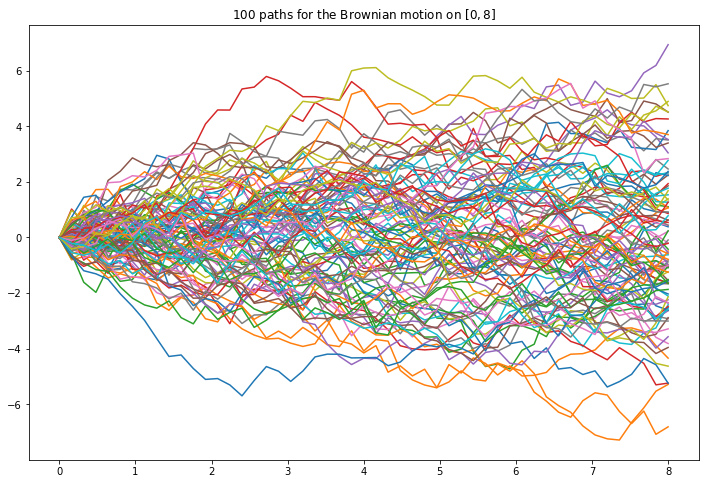

In [3]:
x = paths_of_BM(T=8, N=50, m=100)

plt.figure(figsize=(12, 8))
plt.title('100 paths for the Brownian motion on $[0, 8]$')
for i in range(0, 100):
    plt.plot(np.linspace(0, 8, 51), x[i])
plt.show()

### Step 2
We now define a function to calculate the integral of paths of the Brownian motion for a given set of values. Since the paths are constructed using $N$ discrete time points, we linearly interpolate between them.

In [4]:
def integral_paths_of_BM(T, N, m):
    '''
    This function integrates paths for the standard Brownian motion on the interval [0, T]
    and returns the result as an array of size m.
    T is the length of the interval on which standard Brownian motion is defined
    N is the number of equal-length subdivisions of [0, T]
    m is the number of paths
    '''
    paths = paths_of_BM(T, N, m)
    values = (T / N) * (np.sum(paths, axis=1) - 0.5 * paths[:, N])
    return values

### Step 3
Compare it with the normal variable $N(0, \frac{1}{3} T^3)$.

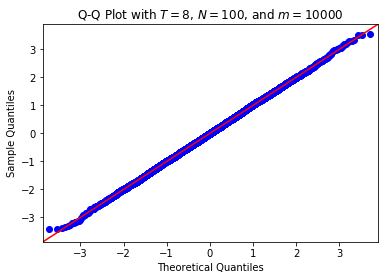

In [5]:
np.random.seed(seed=2019)
T = 8
N = 100
m = 10000

values = integral_paths_of_BM(T, N, m)
scale = np.sqrt((1 / 3) * T**3)

sm.qqplot(values / scale, line='45')  #the factor is there to scale back to standard normal
plt.title('Q-Q Plot with $T=8$, $N=100$, and $m=10000$')
plt.show()

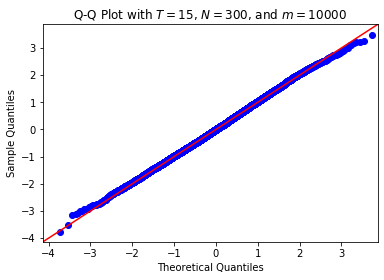

In [6]:
np.random.seed(seed=2020)
T = 15
N = 300
m = 10000

values = integral_paths_of_BM(T, N, m)
scale = np.sqrt((1 / 3) * T**3)

sm.qqplot(values / scale, line='45')  #the factor is there to scale back to standard normal
plt.title('Q-Q Plot with $T=15$, $N=300$, and $m=10000$')
plt.show()

### Conclusion
As one can see from the Q-Q plots that the sample quantiles match theoretical quantiles almost perfectly. Hence, we empiricall verified (in addition to the theoretical proof) that
$$
\int_{0}^{T} W_t \, dt \sim N(0, \frac{1}{3} T^3)
$$